In [1]:
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm

import Boundary_Functions as bf
import timeit
import tables
import h5py

from scipy import stats
from scipy import optimize

#import warnings
#warnings.filterwarnings("ignore")

start = timeit.default_timer()

/home/brandon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
uscal=4
vscal=1

If hd5 is used, uscal and vscal reduce arrays by their value in order to prevent memory overflow. Use when h5 files are very large (i.e. >500MB) otherwise (u,v) plots will overflow memory.

In [3]:
rnputil=np.load('rnputil.npy')
wHD=rnputil[8]
print(wHD)

if wHD==True or wHD==1.0:
    urange=np.load('urange.npy')[::uscal]
    vrange=np.load('vrange.npy')[::vscal]
if wHD==False or wHD==0.0 or wHD==None:
    urange=np.load('urange.npy')
    vrange=np.load('vrange.npy')

1.0


In [4]:
if wHD==True or wHD==1.0:
    with h5py.File('rnp.h5','r') as f:
        r_group_key = list(f.keys())[0]
        rnpi=f[r_group_key]
        rnp = np.asarray(rnpi[::uscal,::vscal])
    with h5py.File('signp.h5','r') as f:
        sig_group_key = list(f.keys())[0]
        signpi=f[sig_group_key]
        signp = np.asarray(signpi[::uscal,::vscal])
    with h5py.File('phinp.h5','r') as f:
        phi_group_key = list(f.keys())[0]
        phinpi=f[phi_group_key]
        phinp = np.asarray(phinpi[::uscal,::vscal])
    with h5py.File('massnp.h5','r') as f:
        mass_group_key = list(f.keys())[0]
        massnpi=f[mass_group_key]
        massnp = np.asarray(massnpi[::uscal,::vscal])
    
    print(str(rnp.nbytes)+" bytes")
    print("Hd5 files used")

if wHD==False or wHD==0.0 or wHD==None:
    rnp=np.load('rnp.npy')
    signp=np.load('sig.npy')
    phinp=np.load('phi.npy')
    massnp=np.load('mass.npy')
    print("Numpy arrays used")

171080000 bytes
Hd5 files used


In [5]:
print(rnputil)

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
Lambda=float(rnputil[7])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)


dv0=vrange[1]-vrange[0]

def fr(r,M0,Q,Lambda):
    return 1-2*M0/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[0.687,1.3,50.0],args=(M0,Q,Lambda), method='hybr')
rminus=sol.x[0]
rplus=sol.x[1]
rcosm=sol.x[2]
    
numpoints=Nu*Nv
print(str(numpoints)+" points")

if Q==0.0:
    predtime=numpoints/(144935)
if Q>0.0:
    predtime=numpoints/(259000)
print("Runtime: about "+str(format(predtime/60,'.2f'))+" minutes")

[8.55300000e+07 1.71060000e+04 5.00000000e+03 2.00000000e+00
 1.50416667e-01 1.00000000e+00 9.50000000e-01 0.00000000e+00
 1.00000000e+00 0.00000000e+00]
21385000 points
Runtime: about 1.38 minutes


In [6]:
#print(massnp[50][-10])
#print(massnp[1000][75])

print(np.nanmean(massnp))

print(phinp)

print(np.nanmax(phinp))

-2.7790712759985226e+19
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.62365126e-05
  -2.62320401e-05 -2.62275691e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -5.25502601e-05
  -5.25412787e-05 -5.25323003e-05]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.47428108e-02
  -8.47430568e-02 -8.47433065e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.47428108e-02
  -8.47430568e-02 -8.47433065e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.47428108e-02
  -8.47430568e-02 -8.47433065e-02]]
0.43212691123702957


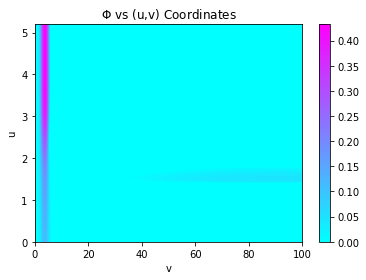

In [7]:
masslist=[1.0,1.00001,1.0001,1.001,1.01]

plot1=plt.pcolormesh(vrange,urange,np.ma.masked_invalid(phinp),cmap=plt.cm.cool,vmin=0.0,vmax=np.nanmax(phinp))
#plot4=plt.contour(vrange,urange,np.ma.masked_invalid(phinp), masslist,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
#plt.clabel(plot4, masslist,  inline=0, inline_spacing=0, fmt='%1.6f',rightside_up=True,fontsize=8)
plt.xlabel('v')
plt.ylabel('u')
#plt.xlim(0,vmax)
#plt.ylim(0,13)
plt.ylim(0,umax)
plt.xlim(0,vmax)
#plt.ylim(9.2758,9.2761)
plt.colorbar(plot1)
plt.title(r'$\Phi$ vs (u,v) Coordinates')
plt.show()



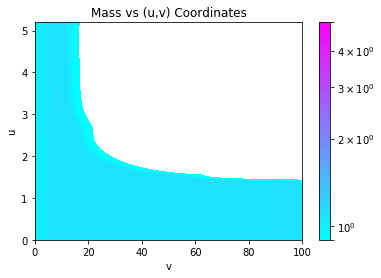

In [8]:
plot1=plt.pcolormesh(vrange,urange,np.ma.masked_invalid(massnp),cmap=plt.cm.cool,norm=LogNorm(vmin=0.9, vmax=5))#vmin=0,vmax=2.0)
#plot4=plt.contour(vrange,urange,np.ma.masked_invalid(massnp), masslist,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
#plt.clabel(plot4, masslist, inline=0, inline_spacing=0, fmt='%1.6f',rightside_up=True, fontsize=8)
plt.xlabel('v')
plt.ylabel('u')
#plt.xlim(0,vmax)
plt.ylim(0,umax)
#plt.xlim(0,10)
plt.xlim(0,vmax)
#plt.ylim(9.2758,9.2761)
plt.colorbar(plot1)
plt.title('Mass vs (u,v) Coordinates')
plt.show()

In [9]:
print(Nu)
print(Nv)
print(urange[500])
print(massnp[1][1])
print(massnp[:,:])
print(np.nanmax(massnp))
print(np.nanmin(massnp))
print(np.argmax(massnp[-10]))

4277
5000
1.419554663212075
0.9999999994608526
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 9.99999999e-01  9.99999999e-01  9.99999999e-01 ...  1.09696377e+00
   1.09696377e+00  1.09696377e+00]
 [ 9.99999999e-01  9.99999999e-01  9.99999999e-01 ...  1.09696249e+00
   1.09696249e+00  1.09696249e+00]
 ...
 [ 9.99991574e-01  1.05812352e+00  1.04265328e+00 ... -2.53580061e+21
  -2.56065961e+21 -2.58576086e+21]
 [ 9.99991574e-01  1.05815092e+00  1.04267333e+00 ... -2.53567760e+21
  -2.56053539e+21 -2.58563542e+21]
 [ 9.99991574e-01  1.05817831e+00  1.04269339e+00 ... -2.53555459e+21
  -2.56041118e+21 -2.58550999e+21]]
1.1053135116685144
-2.850791659360294e+21
423


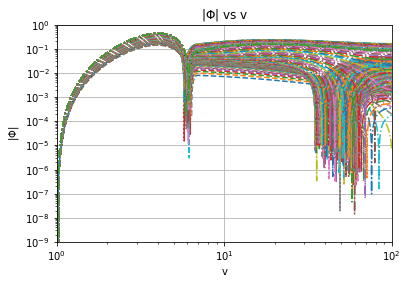

/home/brandon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/home/brandon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars


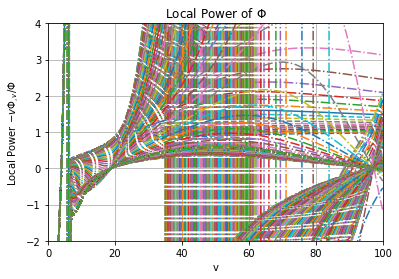

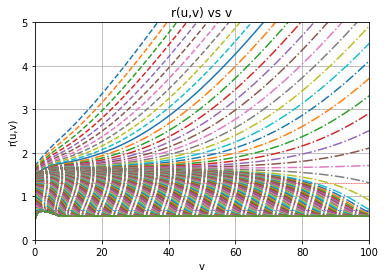

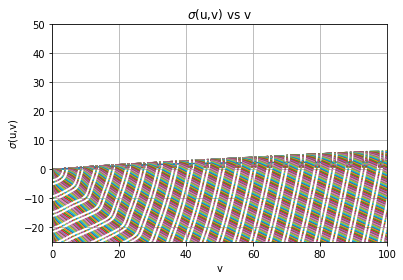

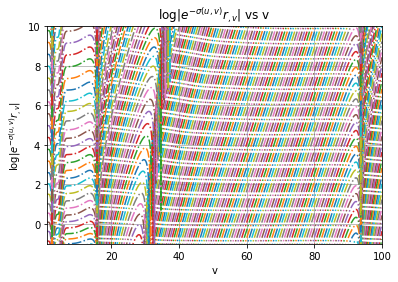

/home/brandon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:156: RuntimeWarning: invalid value encountered in log


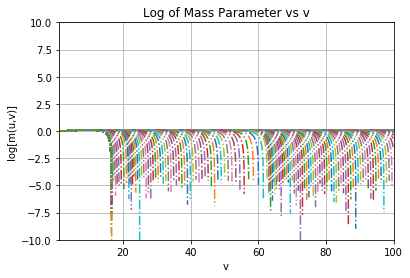

In [10]:

#uNEH=800
#ustep=100
#uN1=uNEH-mth.floor(uNEH/100)*100
#Numax=Nu

uNEH=150
#uNEH=49
ustep=10
uN1=uNEH-mth.floor(uNEH/100)*100
Numax=Nu

#print(uN2)
localpowerlist=np.zeros((Nv))*np.nan
etemplist=np.zeros((Nv))*np.nan
power1list=[]
power3list=[]




#for j in range(0,Nv-1):
    #v=j*vmax/(Nv)
    #localpowerlist[j]=-v*(phinp[uN2][j+1]-phinp[uN2][j])/(dv0*phinp[uN2][j])
    
uN=uN1
while uN < Numax:
    #print(uN)
    if uN<uNEH:
        sample3=plt.plot(vrange,abs(phinp[uN]),'--')
    if uN==uNEH:
        sample3=plt.plot(vrange,abs(phinp[uN]))
    if uN>uNEH:
        sample3=plt.plot(vrange,abs(phinp[uN]),'-.')
    #sample3=plt.plot(vrange,abs(phinp[uN1+uN]))
    uN+=ustep
    
plt.xlabel('v')
plt.ylabel(r'$|\Phi|$')
plt.ylim(0.000000001,1.0)
plt.xlim(1,vmax)
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title(r'$|\Phi|$ vs v')
plt.savefig('PhiEHLambda.png',dpi=300,bbox_inches="tight")
plt.show()    

#sample3=plt.plot(vrange,localpowerlist)
uN=uN1
while uN< Numax:
    for j in range(0,Nv-1):
        v=j*vmax/(Nv)
        localpowerlist[j]=-v*(phinp[uN][j+1]-phinp[uN][j])/((vrange[j+1]-vrange[j])*phinp[uN][j])
    
    if uN<uNEH:
        sample3=plt.plot(vrange,localpowerlist,'--')
    if uN==uNEH:
        sample3=plt.plot(vrange,localpowerlist)
    if uN>uNEH:
        sample3=plt.plot(vrange,localpowerlist,'-.')
    #sample3=plt.plot(vrange,localpowerlist)+
    uN+=ustep
plt.xlim(0,vmax)
plt.xlabel('v')
plt.ylabel(r'Local Power $-v \Phi_{,v}/\Phi$')
plt.ylim(-2,4)
plt.grid()
plt.title(r'Local Power of $\Phi$') #(u='+str(uN2u)+')')#+',uEH='+str(uEH*umax)+')')
#plt.savefig('PhipowerEHLambda.png',dpi=300,bbox_inches="tight")
plt.show()

uN=uN1
plt.plot([0,vmax],[rplus,rplus],'r--',color='red',linewidth=0.5)
plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5)
while uN< Numax:
    if uN<uNEH:
        sample3=plt.plot(vrange,rnp[uN,:],'--')
    if uN==uNEH:
        sample3=plt.plot(vrange,rnp[uN,:])
    if uN>uNEH:
        sample3=plt.plot(vrange,rnp[uN,:],'-.')
    #sample3=plt.plot(vrange,rnp[uN1+uN,:])
    uN+=ustep
    
plt.xlim(0,vmax)
plt.xlabel('v')
plt.ylabel('r(u,v)')
plt.ylim(0,5)
#plt.xscale('log')
#plt.yscale('log')
plt.grid()
plt.title('r(u,v) vs v') #(u='+str(uN2u)+')')#+',uEH='+str(uEH*umax)+')')
#plt.savefig('rEHLambda.png',dpi=300,bbox_inches="tight")
plt.show()

uN=uN1
while uN< Numax:
    if uN<uNEH:
        sample3=plt.plot(vrange,signp[uN,:],'--',label='u='+str(uN))
    if uN==uNEH:
        sample3=plt.plot(vrange,signp[uN,:])
    if uN>uNEH:
        sample3=plt.plot(vrange,signp[uN,:],'-.')
    #sample3=plt.plot(vrange,signp[uN1+uN,:])
    uN+=ustep
plt.xlim(0,vmax)
plt.xlabel('v')
plt.ylabel(r'$\sigma$(u,v)')
plt.ylim(-25,50)
#plt.xscale('log')
#plt.yscale('log')
plt.grid()
plt.title(r'$\sigma$(u,v) vs v') #(u='+str(uN2u)+')')#+',uEH='+str(uEH*umax)+')')
#plt.savefig('sigEHLambda.png',dpi=300,bbox_inches="tight")
plt.show()
#print(localpowerlist[-200])

uN=uN1
while uN< Numax:
    for j in range(0,Nv-1):
        try:
            etemplist[j]=abs(mth.exp(-signp[uN][j])*(rnp[uN][j+1]-rnp[uN][j])/(vrange[j+1]-vrange[j]))
        except OverflowError:
            etemplist[j]=np.nan
    if uN<uNEH:
        sample3=plt.plot(vrange,np.log(etemplist),'--')
    if uN==uNEH:
        sample3=plt.plot(vrange,np.log(etemplist))
    if uN>uNEH:
        sample3=plt.plot(vrange,np.log(etemplist),'-.')
    #print(etemplist)
    uN+=ustep
plt.xlim(1,vmax)
plt.ylim(-1,10)
plt.xlabel('v')
plt.ylabel(r'$\log{|e^{-\sigma(u,v)} r_{,v}|}$')
#plt.ylim(2,4)
#plt.xscale('log')
#plt.yscale('log')
plt.grid()
plt.title(r'$\log{|e^{-\sigma(u,v)} r_{,v}|}$ vs v') #(u='+str(uN2u)+')')#+',uEH='+str(uEH*umax)+')')
plt.savefig('weird-Phi-v_0.png',dpi=300,bbox_inches="tight")
plt.show()


uN=uN1
while uN< Numax:
    if uN<uNEH:
        sample3=plt.plot(vrange,np.log(massnp[uN,:]),'--')
        #sample3=plt.plot([np.nan],[np.nan])
    if uN==uNEH:
        sample3=plt.plot(vrange,np.log(massnp[uN,:]))
        #sample3=plt.plot([np.nan],[np.nan])
    if uN>uNEH:
        sample3=plt.plot(vrange,np.log(massnp[uN,:]),'-.')
        #sample3=plt.plot([np.nan],[np.nan])
    #sample3=plt.plot(vrange,rnp[uN1+uN,:])
    #print(urange[uN])
    uN+=ustep
    
plt.xlim(1,vmax)
plt.xlabel('v')
plt.ylabel('log[m(u,v)]')
plt.ylim(-10,10)
#plt.xscale('log')
#plt.yscale('log')
plt.grid()
plt.title('Log of Mass Parameter vs v') #(u='+str(uN2u)+')')#+',uEH='+str(uEH*umax)+')')
plt.savefig('mass-Phi-v_0.png',dpi=300,bbox_inches="tight")
plt.show()


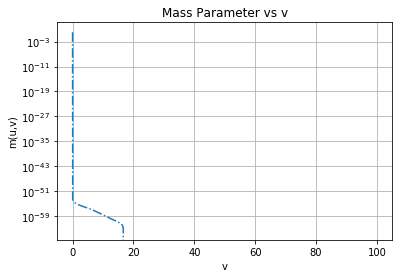

In [11]:
sample3=plt.plot(vrange,np.exp(signp[-10,:])*massnp[-10,:],'-.')
    
#print(np.nanmin(massnp[:,-1000]))    
#plt.xlim(0,50)
plt.xlabel('v')
plt.ylabel('m(u,v)')
#plt.ylim(.1,10**10)
#plt.ylim(-.1,2)
#plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.title('Mass Parameter vs v') #(u='+str(uN2u)+')')#+',uEH='+str(uEH*umax)+')')
#plt.savefig('mass-noPhi.png',dpi=300,bbox_inches="tight")
plt.show()

In [12]:
print(massnp[uNEH][-1])

1.0969337139762183


In [13]:
v1=int(300/vmax*Nv)#2000
v2=int(301/vmax*Nv)#3000
u3=-100

#print(stats.linregress(vrange[v1:v2],localpowerlist[v1:v2]))

print(np.polyfit(np.log(vrange[v1:v2]),np.log(phinp[uNEH][v1:v2]),1.0))
plt.plot(np.log(vrange[v1:v2]),np.log(phinp[uNEH][v1:v2]))
plt.show()

print(np.polyfit(vrange[v1:v2],np.log(massnp[u3][v1:v2]),1.0))
plt.plot(vrange[v1:v2],np.log(massnp[u3][v1:v2]))
plt.show()

print(rnp[u3,v1])
print(massnp[u3,v1])

TypeError: expected non-empty vector for x

In [ ]:
plt.plot(phinp[uNEH,:])
plt.show()


freq=np.fft.fftfreq(vrange.shape[-1],dv0)

Phifft=np.fft.fft(phinp[uNEH,:])
plt.plot(freq,Phifft.real,freq,Phifft.imag)
plt.xlim(0,.5)
plt.grid()
plt.show()

In [ ]:
True=False
if f is p
asdf

In [ ]:
localpowerv=np.zeros((Nu,Nv))*np.nan

for i in range(0,Nu-1):
    for j in range(0,Nv-1):
        v=j*vmax/(Nv)
        localpowerv[i][j]=-v*(phinp[i][j+1]-phinp[i][j])/(dv0*phinp[i][j])
        

In [ ]:
powerlist=[1,2,3,4,5]

#plot1=plt.pcolormesh(vrange,urange,np.ma.masked_invalid(localpowerv),cmap=plt.cm.cool,vmin=0.0,vmax=5.0)
#plot4=plt.contour(vrange,urange,np.ma.masked_invalid(localpowerv), powerlist,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')

plot1=plt.imshow(np.ma.masked_invalid(localpowerv),cmap=plt.cm.cool,extent=(0,vmax,0,umax),aspect='auto',origin='lower',vmin=0.0,vmax=5.0)
plot4=plt.contour(np.ma.masked_invalid(localpowerv), powerlist,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')

plt.clabel(plot4, powerlist,inline=0, inline_spacing=0, fmt='%1.6f',rightside_up=True,fontsize=8)
#sample3=plt.plot(vrange[-1],drdvnplist)
#sample3=plt.plot(vrange,dsigdvnplist)
plt.xlabel('v')
plt.ylabel('u')
#plt.xlim(0,400)
#plt.ylim(9.36,9.37)
#plt.ylim(0,1000)
plt.colorbar(plot1)
plt.title('Power Law ')
#plt.savefig('RN-err-max-N_60.png',dpi=300)
plt.show()

In [ ]:
ueddrange=np.empty((Nu))
ueddrange[0]=0.0
M=massnp[1][-1]

for i in range(0,Nu-1):
    
    #print(M)
    ueddrange[i+1]=ueddrange[i]+(urange[i+1]-urange[i])*(1-2*M/rnp[i][0]+Q**2/rnp[i][0]**2)**(1)*mth.exp(-signp[i][0])
    
plt.plot(ueddrange)
plt.plot(urange)
plt.ylim(0,20)
plt.xlabel('Point Number')
plt.ylabel('u')
plt.grid()
plt.show()



In [ ]:
localpoweru=np.zeros((Nu,Nv))*np.nan

for i in range(0,Nu-1):
    for j in range(0,Nv-1):
        #u=i*umax/(Nu)
        #=urange[i]
        u=ueddrange[i]
        try:
            localpoweru[i][j]=-u*(phinp[i+1][j]-phinp[i][j])/(du0*phinp[i][j])#*(1-2*massnp[i][j]/rnp[i][j]+Q**2/rnp[i][j]**2)**(-1)*mth.exp(signp[i][j])
        except:
            localpoweru[i][j]=np.nan

In [ ]:
powerlist=[1,2,3,4,5]

#plot1=plt.pcolormesh(vrange,urange,np.ma.masked_invalid(localpoweru),cmap=plt.cm.cool,vmin=0.0,vmax=10.0)
#plot4=plt.contour(vrange,urange,np.ma.masked_invalid(localpoweru), powerlist,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')


plot1=plt.imshow(np.ma.masked_invalid(localpoweru),cmap=plt.cm.cool,extent=(0,vmax,0,umax),aspect='auto',origin='lower',vmin=0.0,vmax=5.0)
plot4=plt.contour(np.ma.masked_invalid(localpoweru), powerlist,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')

plt.clabel(plot4, powerlist,inline=0, inline_spacing=0, fmt='%1.6f',rightside_up=True,fontsize=8)
#sample3=plt.plot(vrange[-1],drdvnplist)
#sample3=plt.plot(vrange,dsigdvnplist)
plt.xlabel('v')
plt.ylabel('u')
plt.xlim(0,vmax)
#plt.ylim(9.0,10.8)
plt.colorbar(plot1)
plt.title('Power Law')
#plt.savefig('RN-err-max-N_60.png',dpi=300)
plt.show()

In [ ]:
sample3=plt.plot(abs(phinp[:,-1]))
plt.xlabel('u')
plt.ylabel(r'$|\Phi|$')
#plt.ylim(0.0000000001,0.001)
#plt.xlim(18.2999,18.299905)
#plt.xlim(0.,100)
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title(r'$|\Phi|$ along v=1000')
plt.savefig('Phi1.png',dpi=300,bbox_inches="tight")
plt.show()  


sample3=plt.plot(localpoweru[:,-2])
#plt.xlim(0,1000)
plt.xlabel('u')
plt.ylabel(r'Local Power $-u \Phi_{,u}/\Phi$')
plt.ylim(0,4)
#plt.xlim(11,20)
plt.grid()
plt.title('Test of Prices Law (goes as 2)')
plt.savefig('Phi2.png',dpi=300,bbox_inches="tight")
plt.show()

In [ ]:
stop = timeit.default_timer()

In [ ]:
acttime=stop - start

numpoints=Nu*Nv



print(str(acttime)+' seconds')
print(str((acttime)/60)+' minutes')
print(str((acttime)/3600)+' hours')

print(str(numpoints)+' points')

print(str((numpoints)/(stop - start))+' points per second') 

exttimef=(acttime-predtime)/60

exttime=format(abs((acttime-predtime)/60),'.2f')
if exttimef>0.0:
    print("Took "+str(exttime)+" more minutes")
if exttimef<0.0:
    print("Took "+str(exttime)+" less minutes")
if exttimef==0.0:
    print("Took exactly the right time!!!!")

In [ ]:
uc=1000
vc=-10
print(2.0/1.75)
print((1-2*massnp[uc][vc]/rnp[uc][vc]+Q**2/rnp[uc][vc]**2)**(-1)*mth.exp(-signp[uc][vc]))
print((1-2*massnp[uc][vc]/rnp[uc][vc]+Q**2/rnp[uc][vc]**2)**(-1)*mth.exp(-signp[uc][vc]))
print(massnp[uc][vc])
print(uc*umax/Nu)
print(mth.exp(-signp[uc][vc]))


In [ ]:
uNEH=Nu-100
ustep=10
uN1=uNEH#uNEH-3000
Numax=Nu+1

plt.plot([0,vmax],[rplus,rplus],'r--',color='red',linewidth=0.5, label='r+')
plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5, label='r-')

uN=uN1
while uN< Numax:
    if uN<uNEH:
        sample3=plt.plot(vrange,rnp[uN,:],'--',label='u='+str(urange[uN]))
    if uN==uNEH:
        sample3=plt.plot(vrange,rnp[uN,:],label='u='+str(urange[uN]))
    if uN>uNEH:
        sample3=plt.plot(vrange,rnp[uN,:],'-.',label='u='+str(urange[uN]))
    #sample3=plt.plot(vrange,signp[uN1+uN,:])
    uN+=ustep
plt.xlim(0,vmax)
plt.xlabel('v')
plt.ylabel(r'$r$(u,v)')
plt.ylim(0,1.0)
#plt.xscale('log')
#plt.yscale('log')
#plt.legend()
plt.grid()
plt.title(r'$r$(u,v) vs v') #(u='+str(uN2u)+')')#+',uEH='+str(uEH*umax)+')')
plt.savefig('near_r_0.png',dpi=300,bbox_inches="tight")
plt.show()